In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

h = 0.05
L = 5
Kt = 0.5
t = np.linspace(0,10,200)
x = np.arange(-L/2,L/2,h)
y= np.arange(-L/2,L/2,h)
X,Y = np.meshgrid(x,y)
eta0 = 10*np.exp(-(X**2 + Y**2))
eta0.ravel().shape



(10000,)

In [38]:
def heat_eqn(eta,t, kt, x,y):
    eta = eta.reshape((len(x),len(y)))
    eta_xx = np.gradient(np.gradient(eta,x,axis=0),x,axis=0)
    eta_yy = np.gradient(np.gradient(eta,y,axis=1),y,axis=1)
    return (kt*(eta_xx + eta_yy)).ravel()

twodheat = odeint(heat_eqn,eta0.ravel(),t,args=(Kt,x,y))

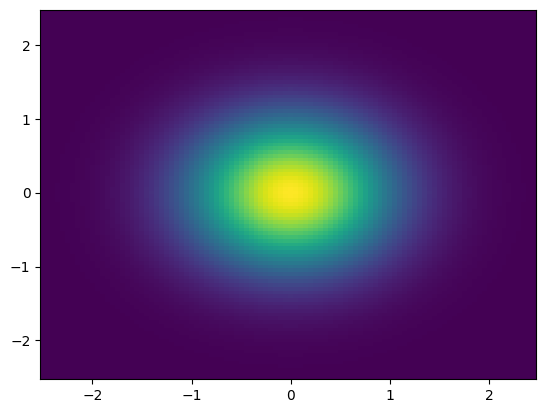

In [39]:
plt.pcolormesh(X,Y,twodheat[0].reshape(100,100))

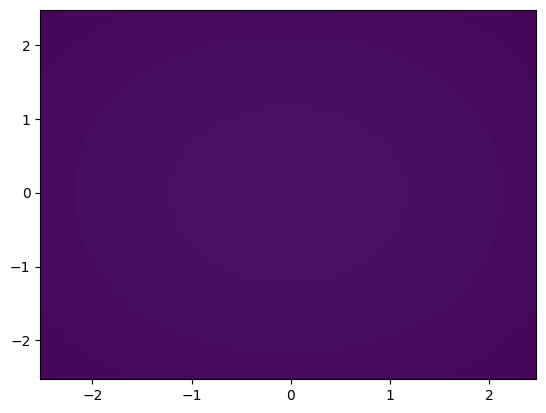

In [40]:
from matplotlib.animation import FuncAnimation
fig,ax = plt.subplots()
mesh = ax.pcolormesh(X,Y,twodheat[0].reshape(100,100))

def step(i):
    mesh.set_array(twodheat[i])
    return mesh,
func = FuncAnimation(fig,step,frames=len(twodheat),interval=500,blit=True)
func.save('heat.gif')

In [ ]:
import pysindy as ps
library_function =  [lambda x: x, lambda x:x*x]
library_function_names = [lambda x: x, lambda x: x + x]
dt = t[1] - t[0]
pde_lib = ps.PDELibrary(
#     library_functions=library_functions,
#    library_functions=library_function,
#    function_names=library_function_names,
    derivative_order=2,
    spatial_grid=np.asarray([X,Y]).T,
    is_uniform=False,
    include_interaction=False
)
optimizer = ps.STLSQ(threshold=0.05, alpha=1e-5, normalize_columns=False)
model = ps.SINDy(feature_library=pde_lib,optimizer=optimizer,feature_names=['c'])
model.fit(twodheat,t=dt)
model.print()i